# Battle of Neighborhoods Capstone
## Isaias Hernandez
## July 9, 2020 

## Table of Contents
* [Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Visualization](#visualization)
* [Results](#results)

## Business Problem:
<a name="introduction"></a>

I was always curious as to why there are not many gyms in the east side of Las Vegas. This is where I reside and going to the closest gym is around a 20 to 30 minute drive. The gym that I go to usually is surrounded by crimes, and sometimes I get nervous leaving my vehicle unattended. The purpose of project is to find out if having a gym near me would relieve the stress that comes with going to the nearest gym.

In this project we will be looking at criminal data that will allow us to view Las Vegas crime rates and where they are more pronounced. This will allow us to form a prediction as to where we could build a gym that is far from crime filled areas.

## Data
<a name="data"></a>

The data that will be used for this project are as follows:
* Police data that consists of location and type of crimes
* Gyms that are in Las Vegas

The criminal data will be extracted from a website by the name of Kaggle. The gym data will be extracted by Foursquare, data will be used from location of Las Vegas only.


We will start by importing the libraries that will be used in this project.

In [2]:
import pandas as pd
import numpy as np 
import requests as rq
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import json
from pandas.io.json import json_normalize
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Libraries have been imported")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
# The code was removed by Watson Studio for sharing.

Event Number              Event Date  Type  \
0  LLV160720002873  07/20/2016 06:54:00 PM   441   
1  LLV160810001830  08/10/2016 12:26:00 PM   411   
2  LLV160811001266  08/11/2016 09:28:00 AM  406V   
3  LLV160812001133  08/12/2016 09:25:00 AM  406V   
4  LLV160812001587  08/12/2016 11:45:00 AM  406V   

                 Type Description                         General Location  \
0  MALICIOUS DESTRUCTION OF PROPE  2600 HUNDRED BLOCK OF SCOTCH HEATHER ST   
1            STOLEN MOTOR VEHICLE     5400 HUNDRED BLOCK OF W CHEYENNE AVE   
2                   AUTO BURGLARY     300 HUNDRED BLOCK OF E DESERT INN RD   
3                   AUTO BURGLARY       9700 HUNDRED BLOCK OF SANDMIST AVE   
4                   AUTO BURGLARY   5800 HUNDRED BLOCK OF W LAKE MEAD BLVD   

   Beat Disposition     Map X      Map Y                   Location 1  
0    J2           C  809926.0  6752913.0  (36.13977667, -115.0625757)  
1    X2           C  764279.0  6780828.0  (36.21703444, -115.2168142)  
2  None           C       NaN        NaN                          NaN  
3    V2           C  737190.0  6774952.0  (36.20113843, -115.3087058)  
4    W2           C  763390.0  6773029.0   (36.19561907, -115.219927)

The shape of the data gathered was big so we will be using the most recent data and limiting the data to only 1000 rows.

In [4]:
lvmpd_df.shape

(171743, 10)

In [5]:
lvmpd_df = lvmpd_df.dropna(axis = 0)
lvmpd_df.shape

(171427, 10)

In [6]:
type(lvmpd_df['Event Date'][0])

str

In [7]:
lvmpd_df['Event Date'] = pd.to_datetime(lvmpd_df['Event Date'])

We will transform the date, this is for better visability, can be used for linear analysis. 

In [8]:
lvmpd_df['Event Date'].head()

0   2016-07-20 18:54:00
1   2016-08-10 12:26:00
3   2016-08-12 09:25:00
4   2016-08-12 11:45:00
5   2016-08-12 12:20:00
Name: Event Date, dtype: datetime64[ns]

In [9]:
lvmpd_df_copy = lvmpd_df
lvmpd_df_copy.head()

Event Number          Event Date  Type                Type Description  \
0  LLV160720002873 2016-07-20 18:54:00   441  MALICIOUS DESTRUCTION OF PROPE   
1  LLV160810001830 2016-08-10 12:26:00   411            STOLEN MOTOR VEHICLE   
3  LLV160812001133 2016-08-12 09:25:00  406V                   AUTO BURGLARY   
4  LLV160812001587 2016-08-12 11:45:00  406V                   AUTO BURGLARY   
5  LLV160812001691 2016-08-12 12:20:00   441  MALICIOUS DESTRUCTION OF PROPE   

                          General Location Beat Disposition     Map X  \
0  2600 HUNDRED BLOCK OF SCOTCH HEATHER ST   J2           C  809926.0   
1     5400 HUNDRED BLOCK OF W CHEYENNE AVE   X2           C  764279.0   
3       9700 HUNDRED BLOCK OF SANDMIST AVE   V2           C  737190.0   
4   5800 HUNDRED BLOCK OF W LAKE MEAD BLVD   W2           C  763390.0   
5         400 HUNDRED BLOCK OF E OGDEN AVE   A2           C  786730.0   

       Map Y                   Location 1  
0  6752913.0  (36.13977667, -115.0625757)  
1  6780828.0  (36.21703444, -115.2168142)  
3  6774952.0  (36.20113843, -115.3087058)  
4  6773029.0   (36.19561907, -115.219927)  
5  6764135.0  (36.17092029, -115.1409614)

This data gives us the unique values of crimes.

In [10]:
lvmpd_df_copy['Type Description'].unique()

array(['MALICIOUS DESTRUCTION OF PROPE', 'STOLEN MOTOR VEHICLE',
       'AUTO BURGLARY', 'LARCENY FROM PERSON (NON ROBBE',
       'ASSAULT/BATTERY', 'BURGLARY', 'OTHER DISTURBANCE',
       'RECOVERED MOTOR VEHICLE', 'ROBBERY', 'ASSAULT/BATTERY W/A GUN',
       'ASSAULT/BATTERY W/OTHER DEADLY', 'JUVENILE DISTURBANCE',
       'PERSON WITH A KNIFE', 'PERSON WITH/OTHER DEADLY WEAPO', 'FIGHT',
       'PERSON WITH A GUN', 'INDECENT EXPOSURE', 'HOMICIDE',
       'ASSAULT/BATTERY NEGATIVE INJUR'], dtype=object)

Here we will drop the columnms that will not be used.

In [11]:
lvmpd_df_copy = lvmpd_df_copy.drop(['Event Number', 'Beat', 'Type'], axis = 1)
lvmpd_df_copy.head()

Event Date                Type Description  \
0 2016-07-20 18:54:00  MALICIOUS DESTRUCTION OF PROPE   
1 2016-08-10 12:26:00            STOLEN MOTOR VEHICLE   
3 2016-08-12 09:25:00                   AUTO BURGLARY   
4 2016-08-12 11:45:00                   AUTO BURGLARY   
5 2016-08-12 12:20:00  MALICIOUS DESTRUCTION OF PROPE   

                          General Location Disposition     Map X      Map Y  \
0  2600 HUNDRED BLOCK OF SCOTCH HEATHER ST           C  809926.0  6752913.0   
1     5400 HUNDRED BLOCK OF W CHEYENNE AVE           C  764279.0  6780828.0   
3       9700 HUNDRED BLOCK OF SANDMIST AVE           C  737190.0  6774952.0   
4   5800 HUNDRED BLOCK OF W LAKE MEAD BLVD           C  763390.0  6773029.0   
5         400 HUNDRED BLOCK OF E OGDEN AVE           C  786730.0  6764135.0   

                    Location 1  
0  (36.13977667, -115.0625757)  
1  (36.21703444, -115.2168142)  
3  (36.20113843, -115.3087058)  
4   (36.19561907, -115.219927)  
5  (36.17092029, -115.1409614)

In [12]:
lvmpd_df_copy = lvmpd_df_copy.tail(1000)
lvmpd_df_copy.head()

Event Date         Type Description  \
170741 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743 2018-06-23 08:45:46            AUTO BURGLARY   
170744 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                       Location 1  
170741  6754099.0  (36.1437492371, -115.266639709)  
170742  6746847.0  (36.1231689453, -115.075973511)  
170743  6761874.0  (36.1650810242, -115.256195068)  
170744  6738295.0  (36.1002426147, -115.234092712)  
170745  6765556.0  (36.1745071411, -115.062095642)

In [13]:
lvmpd_df_copy.shape

(1000, 7)

## Analysis
<a name="analysis"></a>

For the analysis section, we will be getting dummy variables in order to do some statistical findings. We will turn the type of crimes into rows which will contain dummy variables. This will allow us to view how many of each type of crimes there are in Las Vegas. This will give us some further insight that will be used for futher analysis.

In [14]:
lvmpd_dummy = pd.get_dummies(lvmpd_df_copy['Type Description'])
lvmpd_dummy.head()

ASSAULT/BATTERY  ASSAULT/BATTERY W/A GUN  \
170741                0                        0   
170742                0                        0   
170743                0                        0   
170744                0                        0   
170745                0                        0   

        ASSAULT/BATTERY W/OTHER DEADLY  AUTO BURGLARY  BURGLARY  FIGHT  \
170741                               0              0         0      0   
170742                               0              0         0      0   
170743                               0              1         0      0   
170744                               0              0         0      0   
170745                               0              0         0      0   

        INDECENT EXPOSURE  JUVENILE DISTURBANCE  \
170741                  0                     0   
170742                  0                     0   
170743                  0                     0   
170744                  0                     0   
170745                  0                     0   

        LARCENY FROM PERSON (NON ROBBE  MALICIOUS DESTRUCTION OF PROPE  \
170741                               0                               0   
170742                               0                               0   
170743                               0                               0   
170744                               0                               0   
170745                               0                               0   

        OTHER DISTURBANCE  PERSON WITH A GUN  PERSON WITH A KNIFE  \
170741                  0                  0                    0   
170742                  0                  0                    0   
170743                  0                  0                    0   
170744                  1                  0                    0   
170745                  1                  0                    0   

        PERSON WITH/OTHER DEADLY WEAPO  RECOVERED MOTOR VEHICLE  ROBBERY  \
170741                               0                        0        0   
170742                               0                        1        0   
170743                               0                        0        0   
170744                               0                        0        0   
170745                               0                        0        0   

        STOLEN MOTOR VEHICLE  
170741                     1  
170742                     0  
170743                     0  
170744                     0  
170745                     0

In [15]:
lvmpd_copy = pd.concat([lvmpd_df_copy, lvmpd_dummy], axis = 1)
lvmpd_copy.head()

Event Date         Type Description  \
170741 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743 2018-06-23 08:45:46            AUTO BURGLARY   
170744 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                       Location 1  ASSAULT/BATTERY  \
170741  6754099.0  (36.1437492371, -115.266639709)                0   
170742  6746847.0  (36.1231689453, -115.075973511)                0   
170743  6761874.0  (36.1650810242, -115.256195068)                0   
170744  6738295.0  (36.1002426147, -115.234092712)                0   
170745  6765556.0  (36.1745071411, -115.062095642)                0   

        ASSAULT/BATTERY W/A GUN  ASSAULT/BATTERY W/OTHER DEADLY  ...  \
170741                        0                               0  ...   
170742                        0                               0  ...   
170743                        0                               0  ...   
170744                        0                               0  ...   
170745                        0                               0  ...   

        JUVENILE DISTURBANCE  LARCENY FROM PERSON (NON ROBBE  \
170741                     0                               0   
170742                     0                               0   
170743                     0                               0   
170744                     0                               0   
170745                     0                               0   

        MALICIOUS DESTRUCTION OF PROPE  OTHER DISTURBANCE  PERSON WITH A GUN  \
170741                               0                  0                  0   
170742                               0                  0                  0   
170743                               0                  0                  0   
170744                               0                  1                  0   
170745                               0                  1                  0   

        PERSON WITH A KNIFE  PERSON WITH/OTHER DEADLY WEAPO  \
170741                    0                               0   
170742                    0                               0   
170743                    0                               0   
170744                    0                               0   
170745                    0                               0   

        RECOVERED MOTOR VEHICLE  ROBBERY  STOLEN MOTOR VEHICLE  
170741                        0        0                     1  
170742                        1        0                     0  
170743                        0        0                     0  
170744                        0        0                     0  
170745                        0        0                     0  

[5 rows x 24 columns]

In [16]:
df_group1 = lvmpd_copy.drop(['Event Date', 'General Location', 'Disposition', 'Map X', 'Map Y', 'Location 1'], axis = 1)
df_group2 = df_group1.groupby('Type Description', axis = 0).count()
df_group2 = df_group2['FIGHT']
df_group2.head(20)

Type Description
ASSAULT/BATTERY                   104
ASSAULT/BATTERY W/A GUN             4
ASSAULT/BATTERY W/OTHER DEADLY     11
AUTO BURGLARY                      89
BURGLARY                          125
FIGHT                              13
INDECENT EXPOSURE                   8
JUVENILE DISTURBANCE                4
LARCENY FROM PERSON (NON ROBBE      8
MALICIOUS DESTRUCTION OF PROPE     75
OTHER DISTURBANCE                 384
PERSON WITH A GUN                   6
PERSON WITH A KNIFE                 5
PERSON WITH/OTHER DEADLY WEAPO      2
RECOVERED MOTOR VEHICLE            55
ROBBERY                            31
STOLEN MOTOR VEHICLE               76
Name: FIGHT, dtype: int64

In [17]:
df_group3 = pd.DataFrame(df_group2)
df_group3.rename(columns = {'FIGHT': 'Count'}, inplace = True)
df_group3

Count
Type Description                     
ASSAULT/BATTERY                   104
ASSAULT/BATTERY W/A GUN             4
ASSAULT/BATTERY W/OTHER DEADLY     11
AUTO BURGLARY                      89
BURGLARY                          125
FIGHT                              13
INDECENT EXPOSURE                   8
JUVENILE DISTURBANCE                4
LARCENY FROM PERSON (NON ROBBE      8
MALICIOUS DESTRUCTION OF PROPE     75
OTHER DISTURBANCE                 384
PERSON WITH A GUN                   6
PERSON WITH A KNIFE                 5
PERSON WITH/OTHER DEADLY WEAPO      2
RECOVERED MOTOR VEHICLE            55
ROBBERY                            31
STOLEN MOTOR VEHICLE               76

In [18]:
df_group3.rename_axis('Type Description').rename_axis('Type', axis = 'columns')

Type                            Count
Type Description                     
ASSAULT/BATTERY                   104
ASSAULT/BATTERY W/A GUN             4
ASSAULT/BATTERY W/OTHER DEADLY     11
AUTO BURGLARY                      89
BURGLARY                          125
FIGHT                              13
INDECENT EXPOSURE                   8
JUVENILE DISTURBANCE                4
LARCENY FROM PERSON (NON ROBBE      8
MALICIOUS DESTRUCTION OF PROPE     75
OTHER DISTURBANCE                 384
PERSON WITH A GUN                   6
PERSON WITH A KNIFE                 5
PERSON WITH/OTHER DEADLY WEAPO      2
RECOVERED MOTOR VEHICLE            55
ROBBERY                            31
STOLEN MOTOR VEHICLE               76

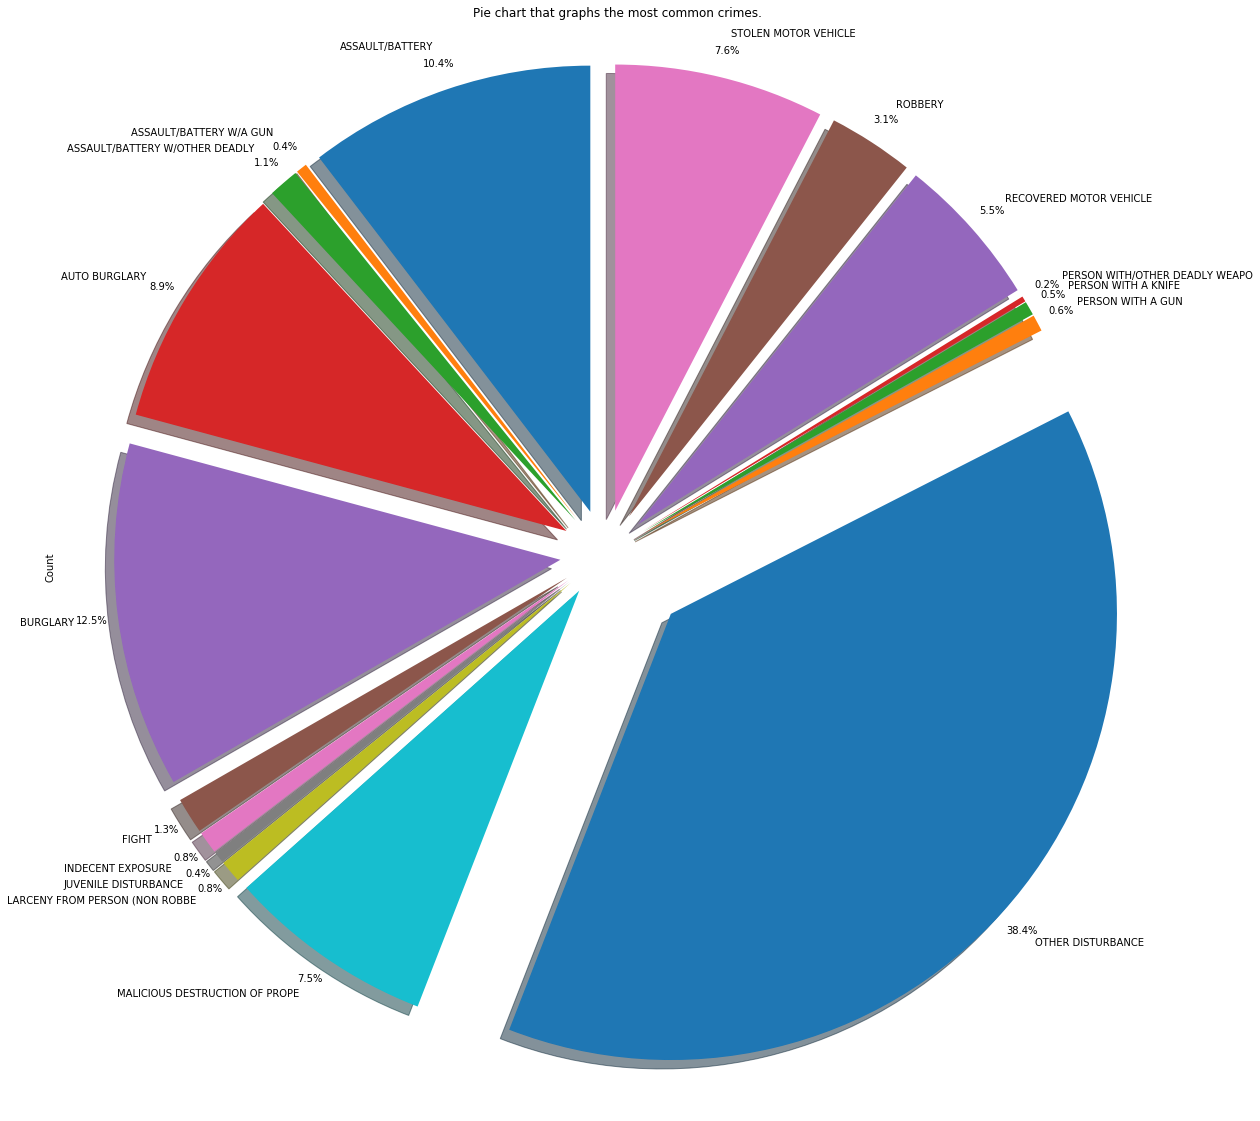

In [19]:
explode_list = [0.1, .1, .1, .1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
df_group3['Count'].plot(kind = 'pie', figsize = (20, 20), autopct = '%1.1f%%', startangle = 90, shadow = True, pctdistance = 1.06, explode = explode_list)
plt.title('Pie chart that graphs the most common crimes.')
plt.axis('equal')
plt.show()

The chart above gives us some analysis that is insightful, and easy to read data. The chart gives us a percentage of each criminal value. What I am most concerned about when going to the gym is auto burglary and robbery. They are not as high as I would expect yet it is a high percentage out of 1000. 

In [20]:
latitude = 36.1699
longitude = -115.1398
vegas_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
vegas_map

## Methodology
<a name="methodology"></a>

In this project our main focus is going to be building a gym that is furthest away from the crime. Now looking at the pie chart can be a bit confusing, but this tells us the distribution from different crimes. The biggest contributor being "Other Disturbances". In the folium maps we will be have the ability to cluster the crimes in Las Vegas and further see where we can safely open a gym.

In [21]:
lvmpd_copy.rename(columns = {'Location 1': 'Location'}, inplace = True)
lvmpd_copy.head()

Event Date         Type Description  \
170741 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743 2018-06-23 08:45:46            AUTO BURGLARY   
170744 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                         Location  ASSAULT/BATTERY  \
170741  6754099.0  (36.1437492371, -115.266639709)                0   
170742  6746847.0  (36.1231689453, -115.075973511)                0   
170743  6761874.0  (36.1650810242, -115.256195068)                0   
170744  6738295.0  (36.1002426147, -115.234092712)                0   
170745  6765556.0  (36.1745071411, -115.062095642)                0   

        ASSAULT/BATTERY W/A GUN  ASSAULT/BATTERY W/OTHER DEADLY  ...  \
170741                        0                               0  ...   
170742                        0                               0  ...   
170743                        0                               0  ...   
170744                        0                               0  ...   
170745                        0                               0  ...   

        JUVENILE DISTURBANCE  LARCENY FROM PERSON (NON ROBBE  \
170741                     0                               0   
170742                     0                               0   
170743                     0                               0   
170744                     0                               0   
170745                     0                               0   

        MALICIOUS DESTRUCTION OF PROPE  OTHER DISTURBANCE  PERSON WITH A GUN  \
170741                               0                  0                  0   
170742                               0                  0                  0   
170743                               0                  0                  0   
170744                               0                  1                  0   
170745                               0                  1                  0   

        PERSON WITH A KNIFE  PERSON WITH/OTHER DEADLY WEAPO  \
170741                    0                               0   
170742                    0                               0   
170743                    0                               0   
170744                    0                               0   
170745                    0                               0   

        RECOVERED MOTOR VEHICLE  ROBBERY  STOLEN MOTOR VEHICLE  
170741                        0        0                     1  
170742                        1        0                     0  
170743                        0        0                     0  
170744                        0        0                     0  
170745                        0        0                     0  

[5 rows x 24 columns]

In [22]:
lat = []
lng = []
for row in lvmpd_copy['Location']:
    try:
        lat.append(row.split(',')[0])
        lng.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lng.append(np.Nan)
lvmpd_copy['latitude'] = lat
lvmpd_copy['longitude'] = lng

In [23]:
lvmpd_lat = lvmpd_copy['latitude'].str.replace("(", "")
lvmpd_lng = lvmpd_copy['longitude'].str.replace(")", "")

In [24]:
lvmpd_coord = pd.concat([lvmpd_df_copy, lvmpd_lat, lvmpd_lng], axis = 1)
lvmpd_coord.head()

Event Date         Type Description  \
170741 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743 2018-06-23 08:45:46            AUTO BURGLARY   
170744 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                       Location 1       latitude  \
170741  6754099.0  (36.1437492371, -115.266639709)  36.1437492371   
170742  6746847.0  (36.1231689453, -115.075973511)  36.1231689453   
170743  6761874.0  (36.1650810242, -115.256195068)  36.1650810242   
170744  6738295.0  (36.1002426147, -115.234092712)  36.1002426147   
170745  6765556.0  (36.1745071411, -115.062095642)  36.1745071411   

              longitude  
170741   -115.266639709  
170742   -115.075973511  
170743   -115.256195068  
170744   -115.234092712  
170745   -115.062095642

In [25]:
lvmpd_lat1 = lvmpd_coord['longitude'].astype('float')
lvmpd_lng1 = lvmpd_coord['latitude'].astype('float')

In [26]:
lvmpd_coord = pd.concat([lvmpd_df_copy, lvmpd_lat1, lvmpd_lng1], axis = 1)
lvmpd_coord.head()

Event Date         Type Description  \
170741 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743 2018-06-23 08:45:46            AUTO BURGLARY   
170744 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                       Location 1   longitude   latitude  
170741  6754099.0  (36.1437492371, -115.266639709) -115.266640  36.143749  
170742  6746847.0  (36.1231689453, -115.075973511) -115.075974  36.123169  
170743  6761874.0  (36.1650810242, -115.256195068) -115.256195  36.165081  
170744  6738295.0  (36.1002426147, -115.234092712) -115.234093  36.100243  
170745  6765556.0  (36.1745071411, -115.062095642) -115.062096  36.174507

In [27]:
lvmpd_coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 170741 to 171742
Data columns (total 9 columns):
Event Date          1000 non-null datetime64[ns]
Type Description    1000 non-null object
General Location    1000 non-null object
Disposition         1000 non-null object
Map X               1000 non-null float64
Map Y               1000 non-null float64
Location 1          1000 non-null object
longitude           1000 non-null float64
latitude            1000 non-null float64
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 78.1+ KB


In [28]:
lvmpd_coord.rename(columns = {'Type Description': 'Types'}, inplace = True)
lvmpd_coord.head()

Event Date                    Types  \
170741 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743 2018-06-23 08:45:46            AUTO BURGLARY   
170744 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                       Location 1   longitude   latitude  
170741  6754099.0  (36.1437492371, -115.266639709) -115.266640  36.143749  
170742  6746847.0  (36.1231689453, -115.075973511) -115.075974  36.123169  
170743  6761874.0  (36.1650810242, -115.256195068) -115.256195  36.165081  
170744  6738295.0  (36.1002426147, -115.234092712) -115.234093  36.100243  
170745  6765556.0  (36.1745071411, -115.062095642) -115.062096  36.174507

This map is where all the crimes were recorded only 1000 records.

In [29]:
for lat, lng, label in zip(lvmpd_coord.latitude, lvmpd_coord.longitude, lvmpd_coord.Types):
    folium.features.CircleMarker([lat, lng], 
                                 radius = 5, 
                                 color = 'Red', 
                                 fill = True,
                                 popup = label,
                                 fill_color = 'blue',
                                 fill_opacity = 0.6).add_to(vegas_map)
vegas_map

We put the data into clusters and see that the east side of the city is full of crimes. The darker the cluster the more crimes are commited in that area.

In [30]:
from folium import plugins
vegas_map_cluster = folium.Map(location = [latitude, longitude], zoom_start = 12)
cluster_crimes = plugins.MarkerCluster().add_to(vegas_map_cluster)

for lat, lng, label, in zip(lvmpd_coord.latitude, lvmpd_coord.longitude, lvmpd_coord.Types):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label).add_to(cluster_crimes)

vegas_map_cluster

In [31]:
CLIENT_ID = 'CE5JAZDXGNYN0RG52GRAGFHTFWIM5OGZWONJLXN1MMM4WDQF' # your Foursquare ID
CLIENT_SECRET = '5FIZX4H5GNCKMXXY5JMU13LBQCBRWMAMLMNPV2FQQLHZFDNV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
RADIUS = 5000
SEARCH_QUERY = 'gym'
print('Your credentails:')
print('CLIENT_ID: ' + 'Confidential')
print('CLIENT_SECRET:' + 'Confidential')

Your credentails:
CLIENT_ID: Confidential
CLIENT_SECRET:Confidential


Foursquare will allow us to view the data better.

In [32]:
Address = 'Las Vegas, NV'
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(Address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

36.1672559 -115.1485163


In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, SEARCH_QUERY, RADIUS, LIMIT)

In [34]:
results = rq.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f08af0e20a61b42e063f454'},
 'response': {'venues': [{'id': '4c0f383b98102d7fa9f7e406',
    'name': 'Allure ( gym )',
    'location': {'address': '200 W Sahara Ave',
     'lat': 36.144119776199595,
     'lng': -115.15874199821846,
     'labeledLatLngs': [{'label': 'display',
       'lat': 36.144119776199595,
       'lng': -115.15874199821846}],
     'distance': 2734,
     'postalCode': '89102',
     'cc': 'US',
     'city': 'Las Vegas',
     'state': 'NV',
     'country': 'United States',
     'formattedAddress': ['200 W Sahara Ave',
      'Las Vegas, NV 89102',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594404593',
    'hasPerk': False},
   {'id': '4f61fa58e4b07ccaa5e675f4',
    'name': '

In [35]:
venues = results['response']['venues']
nearby_venues = json_normalize(venues)
filter_col = ['name', 'categories', 'location.lat', 'location.lng', 'location.postalCode']
nearby_venues = nearby_venues.loc[:, filter_col]
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head(10)

name  \
0                       Allure ( gym )   
1              Golden Nugget Spa & Gym   
2                  Golden Nugget - Gym   
3                    Golden Nugget Gym   
4  Gym @ Las Vegas Golf & Country Club   
5                 California Hotel Gym   
6   Clark County Government Center Gym   
7                 Turnberry Towers Gym   
8                             Soho Gym   
9                      The Ogden's gym   

                                          categories        lat         lng  \
0  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.144120 -115.158742   
1  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.169052 -115.146067   
2  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  36.169437 -115.146160   
3  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.171104 -115.146409   
4  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.134009 -115.147387   
5  [{'id': '4bf58dd8d48988d175941735', 'name': 'G...  36.172263 -115.144729   
6  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.166178 -115.154089   
7  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.140735 -115.152492   
8  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.159824 -115.147141   
9  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...  36.169158 -115.140257   

  postalCode  
0      89102  
1        NaN  
2        NaN  
3        NaN  
4      89109  
5      89101  
6      89106  
7      89109  
8      89101  
9      89101

In [36]:
def get_cat_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
nearby_venues['categories'] = nearby_venues.apply(get_cat_type, axis = 1)

View the gym dataframe and see where the majority of the gyms are located.

In [37]:
nearby_venues.head(50)

name  \
0                        Allure ( gym )   
1               Golden Nugget Spa & Gym   
2                   Golden Nugget - Gym   
3                     Golden Nugget Gym   
4   Gym @ Las Vegas Golf & Country Club   
5                  California Hotel Gym   
6    Clark County Government Center Gym   
7                  Turnberry Towers Gym   
8                              Soho Gym   
9                       The Ogden's gym   
10                  Treasure Island Gym   
11                   Palace Station Gym   
12                      Third Floor Gym   
13                       LVFR FH #1 Gym   
14                          The 211 Gym   
15                             Dula Gym   
16                 Embassy Suites - Gym   
17                       LVFR FS# 1 Gym   
18                        El Cortez Gym   
19           The Hit Factory Boxing Gym   
20                            Hawks Gym   
21                           FS# 10 Gym   
22                     gym de le oignon   
23                             HGVC Gym   
24                     Gym At The Palms   
25           Gym at Trump International   
26             Pound 4 Pound Boxing Gym   
27          Turnberry Place Tower 4 Gym   
28                          Gym @ Sunny   
29      Springhill Marriott Rooftop Gym   
30                              TBP Gym   
31                         Westgate Gym   
32                     LVFR FH #106 Gym   
33                  The Spa Gym at Wynn   
34                    Stirling Club Gym   
35                              The Gym   
36                      Gymboree Outlet   
37                           Valley Gym   
38                              Sky Gym   
39                              VIP GYM   
40                       LVFR FH #8 Gym   
41                          GYM @ TELUS   
42                   Gym @ Shelter Cove   
43                              The Gym   
44                              CCT Gym   
45          Stratosphere Fitness Center   
46         Backyard Gym @ Rancho Relaxo   
47                    Fight Capital Gym   
48                      Wells Fargo Gym   
49                Summer Bay Resort Gym   

                                  categories        lat         lng postalCode  
0                                        Gym  36.144120 -115.158742      89102  
1                                        Gym  36.169052 -115.146067        NaN  
2                                      Hotel  36.169437 -115.146160        NaN  
3                                        Gym  36.171104 -115.146409        NaN  
4                                        Gym  36.134009 -115.147387      89109  
5                       Gym / Fitness Center  36.172263 -115.144729      89101  
6                                        Gym  36.166178 -115.154089      89106  
7                                        Gym  36.140735 -115.152492      89109  
8                                        Gym  36.159824 -115.147141      89101  
9                                        Gym  36.169158 -115.140257      89101  
10                                       Gym  36.124773 -115.171995      89109  
11                                       Gym  36.142052 -115.175035      89102  
12                                       Gym  36.166068 -115.138267      89101  
13                              Fire Station  36.175021 -115.140782        NaN  
14                                       Gym  36.169437 -115.135821        NaN  
15                      Gym / Fitness Center  36.174919 -115.138344      89101  
16                                       Gym  36.123594 -115.153928      89109  
17                              Fire Station  36.175180 -115.140716      89101  
18                                       Gym  36.169494 -115.132656        NaN  
19                                    Arcade  36.144950 -115.155662        NaN  
20                                       Gym  36.142551 -115.140698      89104  
21                      Gym / Fitness Center  36.154339 -11

In [38]:
print('{} venues were returned by Foursquare'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare


## Visualization
<a name="visualization"></a>

Plot the gyms in the map.

In [39]:
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.name):
    label = folium.Popup(str(label), parse_html = True)
    folium.features.CircleMarker([lat, lng], 
                                 radius = 5, color = 'red', popup= label,
                                 fill = True, fill_color = 'lightblue', fill_opacity = 0.6).add_to(vegas_map_cluster)
     
    
vegas_map_cluster

In [40]:
k_clust = 7
k_mean = KMeans(n_clusters = k_clust, random_state = 0).fit(lvmpd_dummy)
k_mean.labels_[0:5]

array([3, 6, 4, 1, 1], dtype=int32)

In [41]:
lvmpd_coord.insert(0, 'Clusters', k_mean.labels_)
lvmpd_coord.head()

Clusters          Event Date                    Types  \
170741         3 2018-06-23 09:40:02     STOLEN MOTOR VEHICLE   
170742         6 2018-06-23 08:07:01  RECOVERED MOTOR VEHICLE   
170743         4 2018-06-23 08:45:46            AUTO BURGLARY   
170744         1 2018-06-23 09:11:42        OTHER DISTURBANCE   
170745         1 2018-06-23 12:08:11        OTHER DISTURBANCE   

                               General Location Disposition     Map X  \
170741       8000 HUNDRED BLOCK OF W SAHARA AVE           C  749668.0   
170742        4500 HUNDRED BLOCK OF BOULDER HWY           A  806002.0   
170743        7200 HUNDRED BLOCK OF LAKELAND CT           C  752727.0   
170744  4800 HUNDRED BLOCK OF S TORREY PINES DR           C  759336.0   
170745       800 HUNDRED BLOCK OF N NELLIS BLVD           J  810000.0   

            Map Y                       Location 1   longitude   latitude  
170741  6754099.0  (36.1437492371, -115.266639709) -115.266640  36.143749  
170742  6746847.0  (36.1231689453, -115.075973511) -115.075974  36.123169  
170743  6761874.0  (36.1650810242, -115.256195068) -115.256195  36.165081  
170744  6738295.0  (36.1002426147, -115.234092712) -115.234093  36.100243  
170745  6765556.0  (36.1745071411, -115.062095642) -115.062096  36.174507

In [51]:
map_clust = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clust)
ys = [i + x + (i*x)**2 for i in range(k_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lvmpd_coord['latitude'], lvmpd_coord['longitude'], lvmpd_coord['Types'], lvmpd_coord['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clust)
       
map_clust

In [44]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 0, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]


Event Date     Map X      Map Y  \
170755 2018-06-23 11:35:45  809996.0  6762552.0   
170760 2018-06-23 13:10:30  794122.0  6760387.0   
170763 2018-06-23 14:28:04  788888.0  6751772.0   
170766 2018-06-23 14:36:01  756812.0  6774382.0   
170767 2018-06-23 14:38:09  777391.0  6742272.0   
170768 2018-06-23 13:30:42  757950.0  6765489.0   
170770 2018-06-23 14:07:01  785840.0  6764059.0   
170771 2018-06-23 13:35:02  757565.0  6759025.0   
170783 2018-06-23 13:38:36  746075.0  6721973.0   
170790 2018-06-23 14:40:50  809975.0  6754741.0   
170794 2018-06-23 16:20:23  779413.0  6749355.0   
170809 2018-06-23 13:35:56  799288.0  6768273.0   
170810 2018-06-23 13:11:58  818094.0  6773408.0   
170813 2018-06-23 17:04:13  753821.0  6732765.0   
170821 2018-06-23 17:36:03  779258.0  6695926.0   
170846 2018-06-23 21:18:37  811849.0  6744813.0   
170849 2018-06-23 21:14:31  809104.0  6750873.0   
170859 2018-06-23 21:18:55  818401.0  6777206.0   
170863 2018-06-23 19:25:51  768830.0  6712235.0   
170866 2018-06-23 22:40:52  814679.0  6763418.0   
170878 2018-06-23 22:05:54  773014.0  6738575.0   
170879 2018-06-23 23:57:58  784142.0  6761678.0   
170880 2018-06-23 21:44:55  801691.0  6751489.0   
170883 2018-06-24 01:22:26  799678.0  6786593.0   
170894 2018-06-23 23:13:11  784165.0  6770528.0   
170912 2018-06-24 02:28:11  797708.0  6755774.0   
170925 2018-06-24 04:25:14  752791.0  6773188.0   
170927 2018-06-24 03:49:28  772929.0  6748798.0   
170948 2018-06-24 07:28:01  782418.0  6755118.0   
170953 2018-06-22 08:45:41  798682.0  6760581.0   
...                    ...       ...        ...   
171552 2018-06-26 11:52:08  801605.0  6776385.0   
171559 2018-06-26 08:34:37  820226.0  6731433.0   
171603 2018-06-26 15:11:45  777697.0  6706880.0   
171615 2018-06-26 15:59:22  810585.0  6741825.0   
171616 2018-06-26 15:59:31  815616.0  6773472.0   
171619 2018-06-26 15:27:50  814288.0  6736759.0   
171621 2018-06-26 13:48:27  781708.0  6706776.0   
171623 2018-06-26 15:24:28  757941.0  6768716.0   
171638 2018-06-26 14:59:21  773619.0  6754436.0   
171639 2018-06-26 14:46:57  793393.0  6752488.0   
171644 2018-06-26 15:10:36  774754.0  6754429.0   
171645 2018-06-26 15:05:18  814851.0  6773145.0   
171679 2018-06-26 19:55:16  780975.0  6741191.0   
171682 2018-06-26 19:08:19  809845.0  6788382.0   
171693 2018-06-26 19:41:10  773587.0  6750526.0   
171695 2018-06-26 21:02:11  809961.0  6760515.0   
171697 2018-06-26 18:00:13  778321.0  6719945.0   
171699 2018-06-26 21:12:01  775493.0  6771946.0   
171702 2018-06-26 19:33:57  790212.0  6765358.0   
171719 2018-06-26 17:43:10  809954.0  6766755.0   
171721 2018-06-27 00:09:11  797465.0  6756063.0   
171722 2018-06-26 22:33:58  794173.0  6762582.0   
171724 2018-06-26 19:43:00  766973.0  6747795.0   
171726 2018-06-26 23:12:56  767065.0  6739546.0   
171729 2018-06-26 21:09:49  754282.0  6759728.0   
171730 2018-06-26 20:41:26  780461.0  6751434.0   
171731 2018-06-27 01:00:11  813420.0  6738755.0   
171733 2018-06-26 23:34:36  783748.0  6769177.0   
171738 2018-06-26 22:45:54  794580.0  6757914.0   
171741 2018-06-26 21:55:50  800149.0  6765154.0   

                             Location 1   longitude   latitude  
170755  (36.1662559509, -115.062164307) -115.062164  36.166256  
170760  (36.1605300903, -115.115974426) -115.115974  36.160530  
170763   (36.136932373, -115.133842468) -115.133842  36.136932  
170766  (36.1994018555, -115.242202759) -115.242203  36.199402  
170767  (36.1109733582, -115.172912598) -115.172913  36.110973  
170768  (36.1749610901, -115.238456726) -115.238457  36.174961  
170770  (36.1707229614, -115.143974304) -115.143974  36.170723  
170771   (36.157207489, -115.239837646) -115.239838  36.157207  
170783  (36.0555229187, -115.279151917) -115.279152  36.055523  
170790   (36.1447982788, -115.06237793) -115.062378  36.144798  
170794   (36.130405426, -115.165969849) -115.165970  36.130405  
170809  (36.1821212769, -115.098342896) -115.098343  36.182121  
170810  

In [45]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 1, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]

Event Date     Map X      Map Y  \
170744 2018-06-23 09:11:42  759336.0  6738295.0   
170745 2018-06-23 12:08:11  810000.0  6765556.0   
170748 2018-06-23 10:49:11  766960.0  6754433.0   
170749 2018-06-23 11:58:51  769275.0  6767433.0   
170750 2018-06-23 11:47:22  768080.0  6754417.0   
170753 2018-06-23 12:32:43  787861.0  6749178.0   
170757 2018-06-23 11:00:53  762253.0  6768723.0   
170758 2018-06-23 11:54:15  768936.0  6738586.0   
170759 2018-06-23 13:34:39  783176.0  6756601.0   
170761 2018-06-23 10:11:46  742482.0  6762730.0   
170772 2018-06-23 14:06:11  761304.0  6756414.0   
170777 2018-06-23 14:02:14  777410.0  6739448.0   
170781 2018-06-23 15:00:43  780334.0  6726893.0   
170784 2018-06-23 12:54:27  809851.0  6753246.0   
170787 2018-06-23 14:48:10  813419.0  6741264.0   
170788 2018-06-23 15:01:14  774391.0  6701508.0   
170791 2018-06-23 14:20:44  790713.0  6738660.0   
170792 2018-06-23 15:50:04  781716.0  6756520.0   
170793 2018-06-23 15:54:53  779607.0  6738570.0   
170795 2018-06-23 16:18:38  809981.0  6765388.0   
170798 2018-06-23 15:17:22  714744.0  6560591.0   
170804 2018-06-23 16:27:10  770960.0  6745353.0   
170808 2018-06-23 17:14:10  777416.0  6738597.0   
170811 2018-06-23 17:19:39  766924.0  6753748.0   
170812 2018-06-23 16:42:40  777666.0  6722522.0   
170814 2018-06-23 17:41:40  782404.0  6773485.0   
170815 2018-06-23 17:46:26  804576.0  6762157.0   
170816 2018-06-23 18:14:59  806519.0  6759899.0   
170818 2018-06-23 18:00:54  753236.0  6773187.0   
170819 2018-06-23 16:36:14  798583.0  6750014.0   
...                    ...       ...        ...   
171663 2018-06-26 18:23:53  742250.0  6749276.0   
171666 2018-06-26 14:03:50  785308.0  6747375.0   
171668 2018-06-26 12:32:19  741384.0  6738177.0   
171669 2018-06-26 12:30:27  783738.0  6757567.0   
171671 2018-06-26 14:17:15  761121.0  6723668.0   
171675 2018-06-26 18:30:18  784284.0  6738558.0   
171676 2018-06-26 19:37:44  761518.0  6759742.0   
171677 2018-06-26 20:11:13  798998.0  6759189.0   
171680 2018-06-26 21:02:08  762502.0  6775749.0   
171681 2018-06-26 19:48:13  813419.0  6741264.0   
171684 2018-06-26 21:20:27  756808.0  6776497.0   
171691 2018-06-26 21:33:37  744932.0  6751865.0   
171692 2018-06-26 20:29:20  784188.0  6732871.0   
171694 2018-06-26 22:37:46  809159.0  6771413.0   
171701 2018-06-26 23:21:53  782943.0  6754844.0   
171705 2018-06-26 21:06:24  810610.0  6771885.0   
171707 2018-06-26 23:26:04  782696.0  6746622.0   
171710 2018-06-26 22:49:55  761452.0  6773485.0   
171711 2018-06-26 22:31:57  787997.0  6754175.0   
171714 2018-06-26 23:30:42  799678.0  6786593.0   
171715 2018-06-26 22:49:09  761421.0  6773456.0   
171723 2018-06-27 00:21:09  814585.0  6755300.0   
171727 2018-06-26 22:58:26  798583.0  6750014.0   
171728 2018-06-27 01:07:13  763587.0  6759781.0   
171732 2018-06-27 01:18:51  768048.0  6754458.0   
171736 2018-06-27 00:10:20  794139.0  6762107.0   
171737 2018-06-27 01:13:58  792567.0  6742643.0   
171739 2018-06-26 20:38:05  783555.0  6741166.0   
171740 2018-06-27 01:10:07  767528.0  6767478.0   
171742 2018-06-27 00:49:33  766931.0  6747812.0   

                             Location 1   longitude   latitude  
170744  (36.1002426147, -115.234092712) -115.234093  36.100243  
170745  (36.1745071411, -115.062095642) -115.062096  36.174507  
170748  (36.1444969177, -115.208068848) -115.208069  36.144497  
170749  (36.1801834106, -115.200057983) -115.200058  36.180183  
170750  (36.1444396973, -115.204277039) -115.204277  36.144440  
170753  (36.1298179626, -115.137359619) -115.137360  36.129818  
170757  (36.1838035583, -115.223831177) -115.223831  36.183804  
170758  (36.1009407043, -115.201591492) -115.201591  36.100941  
170759  (36.1502685547, -115.153114319) -115.153114  36.150269  
170761  (36.1675224304, -115.290893555) -115.290894  36.167522  
170772  (36.1499977112, -115.227203369) -115.227203  36.149998  
170777  (36.1032142639, -115.172889709) -115.172890  36.103214  
170781  

In [46]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 2, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]

Event Date     Map X      Map Y  \
170751 2018-06-23 07:35:31  733613.0  6729500.0   
170756 2018-06-23 13:20:31  777420.0  6744592.0   
170762 2018-06-23 14:26:07  809873.0  6781703.0   
170782 2018-06-23 13:41:15  786556.0  6746566.0   
170785 2018-06-23 13:13:41  786410.0  6764323.0   
170789 2018-06-23 10:40:06  770046.0  6747821.0   
170802 2018-06-23 11:12:07  756721.0  6737158.0   
170805 2018-06-23 15:58:33  766715.0  6759137.0   
170807 2018-06-23 14:33:31  765977.0  6738454.0   
170850 2018-06-23 17:51:20  753059.0  6759678.0   
170853 2018-06-23 14:48:13  769904.0  6763808.0   
170868 2018-06-23 23:08:27  789131.0  6753208.0   
170871 2018-06-23 21:40:39  750446.0  6723997.0   
170873 2018-06-23 21:57:00  759617.0  6755622.0   
170876 2018-06-23 22:05:30  767662.0  6721520.0   
170895 2018-06-23 22:10:47  745115.0  6737076.0   
170902 2018-06-24 00:37:56  744009.0  6717003.0   
170904 2018-06-24 00:54:01  777382.0  6744245.0   
170917 2018-06-24 01:26:26  761160.0  6740212.0   
170919 2018-06-23 21:41:09  751492.0  6723905.0   
170921 2018-06-24 04:38:39  811061.0  6762645.0   
170930 2018-06-24 02:57:45  808420.0  6744224.0   
170935 2018-06-24 02:02:17  765693.0  6742864.0   
170956 2018-06-24 06:26:21  732681.0  6751442.0   
170967 2018-06-24 09:43:14  775493.0  6771946.0   
170969 2018-06-20 15:13:39  777420.0  6744592.0   
170971 2018-06-21 09:37:45  777388.0  6743618.0   
170973 2018-06-24 09:11:51  747095.0  6778178.0   
170977 2018-06-24 07:09:39  800488.0  6784936.0   
170978 2018-06-24 08:51:45  782942.0  6698491.0   
...                    ...       ...        ...   
171555 2018-06-26 12:05:54  809050.0  6751380.0   
171564 2018-06-26 12:34:53  762011.0  6741783.0   
171570 2018-06-26 10:27:21  788866.0  6728066.0   
171573 2018-06-26 10:42:33  766180.0  6752205.0   
171580 2018-06-26 10:39:55  809766.0  6762623.0   
171583 2018-06-26 10:45:12  793311.0  6756675.0   
171589 2018-06-26 14:00:22  809050.0  6751380.0   
171594 2018-06-26 13:09:17  801647.0  6770996.0   
171599 2018-06-26 13:26:18  809610.0  6746881.0   
171611 2018-06-26 13:52:20  818647.0  6745126.0   
171620 2018-06-26 13:31:41  751739.0  6774956.0   
171628 2018-06-26 16:44:24  801426.0  6738957.0   
171629 2018-06-26 16:50:31  802296.0  6779779.0   
171637 2018-06-26 14:09:41  766422.0  6735843.0   
171646 2018-06-26 16:20:56  990281.0  6899559.0   
171652 2018-06-26 17:02:24  738338.0  6727290.0   
171656 2018-06-26 15:04:31  783997.0  6745858.0   
171670 2018-06-26 11:36:35  817614.0  6732153.0   
171673 2018-06-26 16:31:33  793298.0  6758697.0   
171674 2018-06-26 04:51:59  777416.0  6738597.0   
171683 2018-06-26 13:08:26  809108.0  6750742.0   
171686 2018-06-26 18:23:02  730823.0  6786518.0   
171687 2018-06-26 18:25:49  746016.0  6753268.0   
171689 2018-06-26 18:24:01  782894.0  6703320.0   
171698 2018-06-26 21:55:37  766281.0  6760701.0   
171708 2018-06-26 20:05:55  749555.0  6742593.0   
171712 2018-06-26 15:43:24  764263.0  6781837.0   
171716 2018-06-26 17:07:05  809997.0  6762688.0   
171725 2018-06-26 21:23:34  766993.0  6743176.0   
171735 2018-06-27 00:50:53  792440.0  6748310.0   

                             Location 1   longitude   latitude  
170751  (36.0763015747, -115.321243286) -115.321243  36.076302  
170756  (36.1173477173, -115.172782898) -115.172783  36.117348  
170762  (36.2188644409, -115.062232971) -115.062233  36.218864  
170782  (36.1226577759, -115.141822815) -115.141823  36.122658  
170785  (36.1714401245, -115.142044067) -115.142044  36.171440  
170789   (36.1263008118, -115.19770813) -115.197708  36.126301  
170802  (36.0971450806, -115.242958069) -115.242958  36.097145  
170805  (36.1574211121, -115.208839417) -115.208839  36.157421  
170807  (36.1006088257, -115.211608887) -115.211609  36.100609  
170850  (36.1590423584, -115.255096436) -115.255096  36.159042  
170853  (36.1702194214, -115.197975159) -115.197975  36.170219  
170868  (36.1408729553, -115.132995605) -115.132996  36.140873  
170871  

In [47]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 3, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]

Event Date     Map X      Map Y  \
170741 2018-06-23 09:40:02  749668.0  6754099.0   
170747 2018-06-23 10:14:09  739166.0  6749395.0   
170764 2018-06-23 10:50:56  773367.0  6757647.0   
170765 2018-06-22 16:24:28  769749.0  6749150.0   
170774 2018-06-23 14:49:52  779772.0  6766383.0   
170776 2018-06-23 09:13:35  777416.0  6738597.0   
170786 2018-06-23 13:48:50  789648.0  6715102.0   
170801 2018-06-23 08:52:35  806462.0  6744937.0   
170817 2018-06-23 16:26:24  761528.0  6760855.0   
170829 2018-06-23 16:38:29  758821.0  6790035.0   
170860 2018-06-23 14:31:58  739106.0  6810983.0   
170905 2018-06-23 09:13:32  807485.0  6738402.0   
170907 2018-06-23 23:34:06  797671.0  6749171.0   
170908 2018-06-23 19:37:41  759925.0  6790713.0   
170923 2018-06-24 05:16:44  768936.0  6738586.0   
170944 2018-06-24 08:05:19  793586.0  6709400.0   
170949 2018-06-24 08:47:19  818156.0  6754722.0   
170952 2018-06-24 08:02:04  796364.0  6753150.0   
170968 2018-06-16 08:37:48  766164.0  6761825.0   
171006 2018-06-24 10:54:52  765002.0  6769915.0   
171012 2018-06-24 13:59:17  802392.0  6784245.0   
171019 2018-06-24 11:14:33  810276.0  6738557.0   
171024 2018-06-24 13:34:59  790039.0  6736693.0   
171029 2018-06-24 10:12:46  777382.0  6744245.0   
171081 2018-06-24 19:08:12  787804.0  6764633.0   
171096 2018-06-24 19:42:55  767938.0  6763791.0   
171120 2018-06-24 15:22:52  785152.0  6764387.0   
171138 2018-06-24 19:11:28  787179.0  6763356.0   
171142 2018-06-24 22:22:45  766214.0  6759770.0   
171150 2018-06-25 01:00:21  788239.0  6765414.0   
...                    ...       ...        ...   
171359 2018-06-25 16:52:36  800520.0  6765156.0   
171365 2018-06-25 12:09:37  784243.0  6766438.0   
171367 2018-06-25 17:40:04  794755.0  6754512.0   
171368 2018-06-25 16:02:05  745615.0  6809604.0   
171370 2018-06-25 17:19:14  957989.0  6399045.0   
171373 2018-06-25 17:14:55  757531.0  6721477.0   
171378 2018-06-24 05:36:26  780115.0  6741188.0   
171385 2018-06-25 16:52:46  782725.0  6750744.0   
171387 2018-06-25 16:23:28  787179.0  6763356.0   
171423 2018-06-25 15:06:17  768502.0  6747038.0   
171431 2018-06-25 20:41:09  788235.0  6743650.0   
171446 2018-06-26 00:54:47  756724.0  6735072.0   
171458 2018-06-25 20:05:03  806010.0  6734219.0   
171477 2018-06-26 04:51:27  814094.0  6772280.0   
171478 2018-06-26 04:44:37  765563.0  6799171.0   
171518 2018-06-26 10:23:20  754805.0  6796602.0   
171538 2018-06-26 11:02:13  795721.0  6763841.0   
171548 2018-06-26 09:28:33  770920.0  6745589.0   
171593 2018-06-26 14:30:52  787848.0  6745546.0   
171597 2018-06-26 09:41:07  794831.0  6753183.0   
171598 2018-06-26 12:35:36  799508.0  6738426.0   
171601 2018-06-26 12:09:17  752982.0  6757580.0   
171610 2018-06-26 13:15:23  958258.0  6400247.0   
171643 2018-06-26 14:10:09  782823.0  6755911.0   
171651 2018-06-26 13:08:34  767486.0  6767574.0   
171659 2018-06-26 13:04:49  780520.0  6751546.0   
171688 2018-06-26 17:48:31  794673.0  6753319.0   
171700 2018-06-26 21:25:59  942540.0  6386536.0   
171718 2018-06-26 20:03:40  798701.0  6737828.0   
171720 2018-06-26 17:03:50  747439.0  6796886.0   

                             Location 1   longitude   latitude  
170741  (36.1437492371, -115.266639709) -115.266640  36.143749  
170747  (36.1309127808, -115.302261353) -115.302261  36.130913  
170764  (36.1532554626, -115.186325073) -115.186325  36.153255  
170765  (36.1299552917, -115.198692322) -115.198692  36.129955  
170774  (36.1771812439, -115.164505005) -115.164505  36.177181  
170776   (36.1008758545, -115.17288208) -115.172882  36.100876  
170786  (36.0361862183, -115.131843567) -115.131844  36.036186  
170801  (36.1179161072, -115.074447632) -115.074448  36.117916  
170817  (36.1621932983, -115.226387024) -115.226387  36.162193  
170829  (36.2423820496, -115.235206604) -115.235207  36.242382  
170860  (36.3001022339, -115.301856995) -115.301857  36.300102  
170905  (36.0999488831, -115.071098328) -115.071098  36.099949  
170907  

In [48]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 4, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]

Event Date     Map X      Map Y  \
170743 2018-06-23 08:45:46  752727.0  6761874.0   
170746 2018-06-23 08:46:00  752727.0  6761834.0   
170752 2018-06-23 08:40:04  752823.0  6761833.0   
170775 2018-06-23 15:15:14  734250.0  6759564.0   
170778 2018-06-23 11:52:42  781139.0  6768761.0   
170799 2018-06-23 11:11:09  779361.0  6749256.0   
170803 2018-06-19 20:32:29  738634.0  6770776.0   
170826 2018-06-23 17:26:25  766983.0  6751521.0   
170869 2018-06-23 19:48:46  774950.0  6755191.0   
170931 2018-06-20 19:34:21  743637.0  6764560.0   
170933 2018-06-24 05:48:58  796974.0  6743836.0   
170934 2018-06-24 05:43:12  746621.0  6755215.0   
170936 2018-06-23 11:03:39  777398.0  6736728.0   
170940 2018-06-21 21:22:24  793531.0  6706496.0   
170945 2018-06-23 17:03:09  738974.0  6754288.0   
170946 2018-06-20 10:24:59  804613.0  6767397.0   
170947 2018-06-21 23:23:25  782726.0  6749791.0   
170951 2018-06-21 00:06:47  771634.0  6747866.0   
170958 2018-06-24 09:27:07  806884.0  6735238.0   
170959 2018-06-24 09:27:51  809873.0  6781438.0   
170966 2018-06-22 11:12:49  788407.0  6740776.0   
170974 2018-06-24 10:57:04  779623.0  6746469.0   
170979 2018-06-24 09:18:28  776416.0  6751407.0   
170980 2018-06-24 10:16:53  805530.0  6753222.0   
170983 2018-06-24 11:26:51  804340.0  6758657.0   
170987 2018-06-24 11:55:27  715345.0  6748850.0   
170990 2018-06-24 12:11:54  782725.0  6750744.0   
171010 2018-06-24 13:15:08  733095.0  6781321.0   
171020 2018-06-24 14:25:02  737790.0  6731679.0   
171022 2018-06-21 16:37:40  777668.0  6721927.0   
...                    ...       ...        ...   
171300 2018-06-25 14:36:15  756815.0  6772555.0   
171334 2018-06-25 16:32:28  765554.0  6744391.0   
171335 2018-06-25 16:41:36  787949.0  6747693.0   
171350 2018-06-25 07:47:55  789495.0  6725401.0   
171376 2018-06-25 13:25:15  714476.0  6561893.0   
171439 2018-06-25 17:21:47  782712.0  6748383.0   
171482 2018-06-26 07:37:47  761311.0  6761169.0   
171487 2018-06-26 05:52:14  749385.0  6763986.0   
171495 2018-06-25 18:44:45  756777.0  6771452.0   
171499 2018-06-26 09:10:57  777417.0  6738578.0   
171510 2018-06-26 07:43:00  813301.0  6738883.0   
171524 2018-06-26 07:40:42  735230.0  6710270.0   
171525 2018-06-26 10:42:13  792632.0  6722763.0   
171533 2018-06-26 10:51:06  792493.0  6720473.0   
171534 2018-06-26 10:54:31  755202.0  6778862.0   
171540 2018-06-26 06:56:32  753019.0  6757581.0   
171542 2018-06-26 11:18:48  731778.0  6786410.0   
171547 2018-06-26 08:25:44  723679.0  6762380.0   
171550 2018-06-26 11:43:32  819422.0  6756261.0   
171556 2018-06-26 10:59:00  777387.0  6737678.0   
171584 2018-06-26 13:47:08  819747.0  6731952.0   
171586 2018-06-26 13:55:26  807845.0  6765274.0   
171592 2018-06-26 13:54:33  762462.0  6738186.0   
171595 2018-06-26 12:53:33  779793.0  6774470.0   
171606 2018-06-26 15:24:22  788235.0  6743650.0   
171609 2018-06-26 15:37:35  781821.0  6760829.0   
171624 2018-06-26 16:23:34  751268.0  6811733.0   
171635 2018-06-26 17:05:36  799168.0  6780142.0   
171667 2018-06-26 14:05:39  732830.0  6787283.0   
171704 2018-06-26 22:46:16  810017.0  6764364.0   

                             Location 1   longitude   latitude  
170743  (36.1650810242, -115.256195068) -115.256195  36.165081  
170746  (36.1649703979, -115.256195068) -115.256195  36.164970  
170752  (36.1649665833, -115.255867004) -115.255867  36.164967  
170775  (36.1588897705, -115.318809509) -115.318810  36.158890  
170778  (36.1836967468, -115.159835815) -115.159836  36.183697  
170799  (36.1301345825, -115.166145325) -115.166145  36.130135  
170803   (36.189655304, -115.303855896) -115.303856  36.189655  
170826  (36.1364974976, -115.208030701) -115.208031  36.136497  
170869  (36.1464920044, -115.180999756) -115.181000  36.146492  
170931  (36.1725387573, -115.286964417) -115.286964  36.172539  
170933  (36.1150245667, -115.106590271) -115.106590  36.115025  
170934  (36.1468391418, -115.276954651) -115.276955  36.146839  
170936  

In [49]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 5, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]

Event Date     Map X      Map Y  \
170754 2018-06-23 13:07:42  780860.0  6765043.0   
170769 2018-06-23 13:18:02  736941.0  6746175.0   
170796 2018-06-23 13:14:26  788066.0  6738582.0   
170797 2018-06-23 14:26:41  765376.0  6734481.0   
170800 2018-06-23 10:14:51  806723.0  6764836.0   
170806 2018-06-23 15:24:38  766983.0  6746574.0   
170836 2018-06-23 17:14:38  777359.0  6741287.0   
170840 2018-06-23 20:37:55  782858.0  6755892.0   
170843 2018-06-23 20:30:33  743568.0  6747423.0   
170844 2018-06-23 19:39:12  777416.0  6738597.0   
170852 2018-06-23 20:15:27  807939.0  6747523.0   
170857 2018-06-23 21:17:18  942649.0  6386592.0   
170862 2018-06-23 15:43:10  778881.0  6744223.0   
170865 2018-06-23 21:39:34  792102.0  6702049.0   
170882 2018-06-24 01:03:57  788083.0  6737296.0   
170890 2018-06-24 01:26:53  777401.0  6742723.0   
170892 2018-06-24 02:05:47  785138.0  6764405.0   
170901 2018-06-24 00:07:53  957622.0  6396847.0   
170913 2018-06-24 01:16:32  782725.0  6750744.0   
170922 2018-06-24 04:10:30  787833.0  6762991.0   
170928 2018-06-24 05:06:45  782738.0  6744573.0   
170937 2018-06-24 06:00:57  809926.0  6773349.0   
170965 2018-06-24 08:27:36  754445.0  6773183.0   
170988 2018-06-24 10:17:54  784284.0  6738558.0   
170998 2018-06-24 04:12:12  784612.0  6743685.0   
171004 2018-06-24 09:22:45  821933.0  6773535.0   
171016 2018-06-24 12:15:53  799346.0  6765149.0   
171037 2018-06-24 14:45:30  803703.0  6754803.0   
171048 2018-06-24 16:03:39  777398.0  6736728.0   
171053 2018-06-24 16:08:02  789783.0  6763453.0   
...                    ...       ...        ...   
171428 2018-06-26 00:16:21  770540.0  6774303.0   
171436 2018-06-25 20:24:17  792611.0  6706777.0   
171445 2018-06-26 00:42:24  957622.0  6396847.0   
171449 2018-06-25 22:51:18  794667.0  6753143.0   
171450 2018-06-26 00:46:27  787785.0  6744170.0   
171451 2018-06-26 02:17:34  809943.0  6742580.0   
171453 2018-06-26 02:55:26  764279.0  6780828.0   
171461 2018-06-26 02:20:35  789556.0  6745732.0   
171465 2018-06-26 03:18:02  788078.0  6760164.0   
171496 2018-06-26 08:30:17  777387.0  6737678.0   
171498 2018-06-26 02:06:22  777357.0  6741591.0   
171514 2018-06-26 10:09:29  783389.0  6759560.0   
171519 2018-06-26 09:00:39  788244.0  6706748.0   
171537 2018-06-26 09:32:27  780022.0  6738567.0   
171568 2018-06-26 11:20:25  759565.0  6759763.0   
171569 2018-06-26 11:21:04  804308.0  6758681.0   
171581 2018-06-26 11:22:51  772062.0  6754423.0   
171596 2018-06-26 14:47:27  763969.0  6700611.0   
171602 2018-06-26 12:12:50  787820.0  6745818.0   
171612 2018-06-26 14:00:17  802388.0  6759809.0   
171613 2018-06-26 14:42:03  782064.0  6741233.0   
171614 2018-06-26 14:07:10  809307.0  6756376.0   
171640 2018-06-26 14:38:12  809867.0  6787929.0   
171642 2018-06-26 16:47:44  738026.0  6728610.0   
171664 2018-06-26 17:19:15  761533.0  6722213.0   
171672 2018-06-26 19:02:30  794173.0  6762582.0   
171685 2018-06-26 21:27:09  810029.0  6763350.0   
171696 2018-06-26 18:36:42  771268.0  6751816.0   
171703 2018-06-26 20:06:08  787752.0  6744309.0   
171706 2018-06-26 21:37:27  809997.0  6762688.0   

                             Location 1   longitude   latitude  
170754  (36.1734848022, -115.160835266) -115.160835  36.173485  
170769  (36.1220855713, -115.309822083) -115.309822  36.122086  
170796  (36.1007080078, -115.136833191) -115.136833  36.100708  
170797  (36.0897026062, -115.213691711) -115.213692  36.089703  
170800   (36.1725769043, -115.07321167) -115.073212  36.172577  
170806  (36.1229057312, -115.208099365) -115.208099  36.122906  
170836  (36.1082687378, -115.173034668) -115.173035  36.108269  
170840  (36.1483230591, -115.154205322) -115.154205  36.148323  
170843  (36.1254615784, -115.287368774) -115.287369  36.125462  
170844   (36.1008758545, -115.17288208) -115.172882  36.100876  
170852         (36.125, -115.069404602) -115.069405  36.125000  
170857  (35.1306877136, -114.625198364) -114.625198  35.130688  
170862  

In [50]:
lvmpd_coord.loc[lvmpd_coord['Clusters'] == 6, lvmpd_coord.columns[[1] + list(range(5, lvmpd_coord.shape[1]))]]

Event Date     Map X      Map Y  \
170742 2018-06-23 08:07:01  806002.0  6746847.0   
170773 2018-06-23 08:44:23  819269.0  6732474.0   
170779 2018-06-23 10:58:40  762252.0  6773659.0   
170780 2018-06-23 14:08:19  782745.0  6767529.0   
170842 2018-06-23 20:42:30  792755.0  6760386.0   
170872 2018-06-23 20:54:57  786151.0  6763849.0   
170910 2018-06-24 02:00:42  803352.0  6749719.0   
170916 2018-06-24 04:12:39  770249.0  6774727.0   
170939 2018-06-24 03:07:59  813272.0  6761296.0   
170941 2018-06-24 07:10:00  774309.0  6769560.0   
171033 2018-06-24 14:17:30  783488.0  6769200.0   
171050 2018-06-24 10:28:36  779518.0  6759718.0   
171090 2018-06-24 20:22:05  773126.0  6717831.0   
171114 2018-06-24 23:36:59  801296.0  6743948.0   
171123 2018-06-24 21:30:01  810260.0  6738127.0   
171137 2018-06-24 20:42:56  785272.0  6746224.0   
171145 2018-06-25 01:00:37  803905.0  6754526.0   
171263 2018-06-25 08:02:24  807262.0  6781255.0   
171284 2018-06-25 10:54:54  810276.0  6738557.0   
171287 2018-06-25 12:12:54  813734.0  6760056.0   
171338 2018-06-25 11:51:22  775493.0  6771946.0   
171345 2018-06-25 13:21:16  782424.0  6757336.0   
171352 2018-06-25 10:12:49  818027.0  6768789.0   
171357 2018-06-25 15:15:56  780967.0  6722637.0   
171371 2018-06-25 16:05:24  805035.0  6767752.0   
171390 2018-06-25 20:07:59  790865.0  6759744.0   
171395 2018-06-25 17:29:45  774915.0  6737303.0   
171400 2018-06-25 16:27:05  803648.0  6749369.0   
171401 2018-06-25 18:10:28  788785.0  6758886.0   
171404 2018-06-25 16:01:05  808703.0  6760901.0   
171413 2018-06-25 18:28:09  788770.0  6739771.0   
171435 2018-06-25 21:47:47  766109.0  6759268.0   
171438 2018-06-26 01:01:39  803970.0  6773207.0   
171447 2018-06-26 01:34:57  786678.0  6748861.0   
171455 2018-06-25 23:47:56  814378.0  6760081.0   
171459 2018-06-26 00:44:04  777420.0  6744642.0   
171475 2018-06-26 05:30:49  750163.0  6746960.0   
171490 2018-06-26 07:51:13  784973.0  6766422.0   
171530 2018-06-26 09:45:14  740538.0  6745173.0   
171536 2018-06-26 08:49:30  784278.0  6744625.0   
171553 2018-06-26 09:06:01  778985.0  6722624.0   
171571 2018-06-26 11:58:10  766907.0  6756638.0   
171572 2018-06-26 10:23:24  818392.0  6775048.0   
171585 2018-06-26 12:59:04  765335.0  6739805.0   
171649 2018-06-26 16:01:30  754568.0  6731390.0   
171654 2018-06-26 15:45:48  768627.0  6770389.0   
171657 2018-06-26 15:41:58  777420.0  6744642.0   
171662 2018-06-26 15:37:05  803860.0  6749661.0   
171665 2018-06-26 17:56:45  800476.0  6783933.0   
171678 2018-06-26 16:10:02  770532.0  6773650.0   
171690 2018-06-26 17:44:54  810276.0  6738557.0   
171709 2018-06-26 19:19:09  782418.0  6755118.0   
171713 2018-06-26 19:29:21  808386.0  6756562.0   
171717 2018-06-26 22:13:50  762739.0  6762128.0   
171734 2018-06-26 20:09:23  764510.0  6737341.0   

                             Location 1   longitude   latitude  
170742  (36.1231689453, -115.075973511) -115.075974  36.123169  
170773  (36.0834884644, -115.031326294) -115.031326  36.083488  
170779  (36.1973609924, -115.223777771) -115.223778  36.197361  
170780  (36.1802940369, -115.154411316) -115.154411  36.180294  
170842  (36.1605453491, -115.120605469) -115.120605  36.160545  
170872  (36.1701431274, -115.142929077) -115.142929  36.170143  
170910  (36.1310958862, -115.084892273) -115.084892  36.131096  
170916  (36.2002105713, -115.196655273) -115.196655  36.200211  
170939  (36.1627540588, -115.051086426) -115.051086  36.162754  
170941   (36.1859703064, -115.18296814) -115.182968  36.185970  
171033  (36.1848754883, -115.151870728) -115.151871  36.184875  
171050  (36.1588745117, -115.165458679) -115.165459  36.158875  
171090  (36.0438804626, -115.187690735) -115.187691  36.043880  
171114   (36.115272522, -115.091957092) -115.091957  36.115273  
171123   (36.099155426, -115.061714172) -115.061714  36.099155  
171137   (36.1217346191, -115.14617157) -115.146172  36.121735  
171145  (36.1442947388, -115.082939148) -115.082939  3

## Results
<a name="results"></a>

We can see that by using KMeans the most crowded cluster is that of Cluster 2. Cluster 2 is full of other disturbances which are not fully stated within the report, yet we have a result of around 384 incidents. This gives us a percentage of about .384 which is well above 1/3 of the crimes in Las Vegas. Where I wanted a gym to be placed has juvinile activity and other disturbances. There are only 2 auto burglary incidents around the area, these are in Cluster 4 or light blue shade. I would feel comfertable placing a gym within the area, yet there are  better places that can have gyms such as the north west side of town.

## Thank You!